### Scribers
    Sharma Ritika
    Macris Troy
    Laranio Nolan

## Clustering

`Clustering` is a technique that involves grouping on data points into specific groups where a data point in one group shares similar properties with the other data points in the same group.

The group of points that resembel each other are said to form a cluster.

We perform clustering analysis to gain meaningful insights from our data by using various clustering algorithms. Some of the commonly used clustering algorithms include: `K-means clustering`, `Mean shift clustering`, `Gaussian Mixture` models, etc.


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering

Let's begin with plotting a graph that contains data points that are randomly scattered

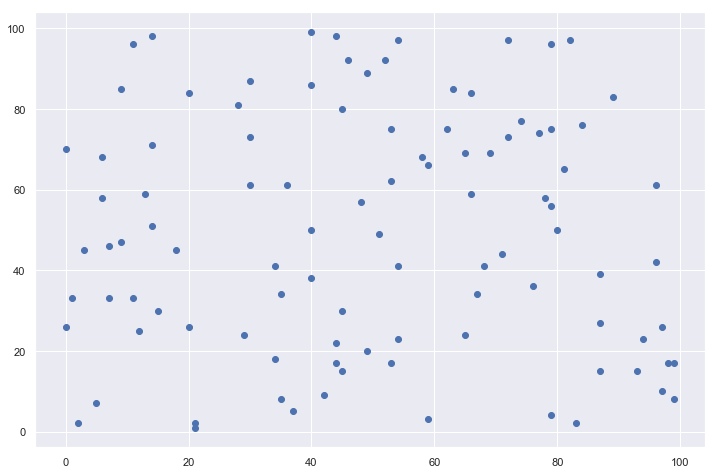

In [2]:
x_axis = np.random.choice(np.arange(100), size=100)
y_axis = np.random.choice(np.arange(100), size=100)
plt.figure(figsize=[12,8])
plt.scatter(x_axis, y_axis)

In the above graph we see points that are randomly scattered all around the x-axis and the y-axis and it is hard to group the points together.

Let's take a look at the other graph plotted below.

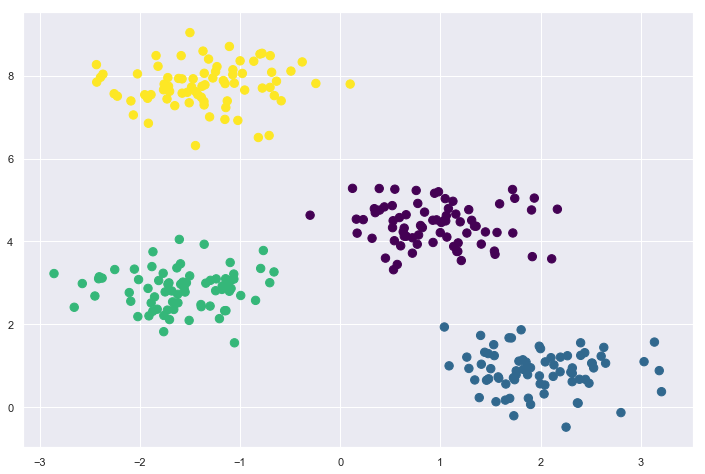

In [3]:
# using make_blobs to ditribute total number of points equally among 4 clusters
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.50, random_state=0)
plt.figure(figsize=[12,8])
plt.scatter(X[:, 0], X[:, 1], c=y_true, s=70, cmap='viridis');

In this graph we see the group of data points lying very close to each other within the group. These collections of data points are refered to as clusters.

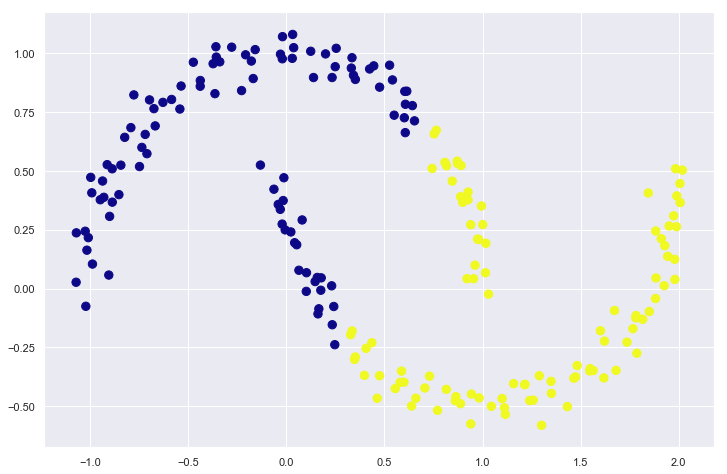

In [4]:
X, y = make_moons(200, noise=.05, random_state=0)
labels = KMeans(2, random_state=0).fit_predict(X)
plt.figure(figsize=[12,8])
plt.scatter(X[:, 0], X[:, 1], c=labels, s=70, cmap='plasma');

There may also be observered some patterns that may have such wierd and messy shapes with points from different cluster mixed as noise.

Handling such clusters might be challenging

In such cases we may need to perform transformation to make the points more linearly separable

We can use `SpectralClustering` estimator from `Scikit Learn library`.  It uses the nearest neighbors graph to compute a higher-dimensional representation of this data.

The data is then assigned labels using a k-means algorithm

#### Applications of clustering

Clustering can be used anywhere we want to draw some meaningful intuition from the data.
1.  Image segmentation
2.  Document clustering
3.  Market segmentation
4.  Business analysis where segmentation can be performed on users activity, preferences, sales monitoring, etc.

/anaconda3/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


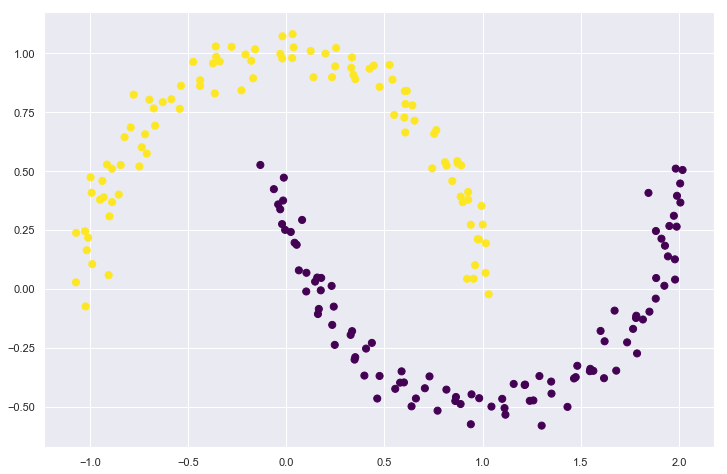

In [5]:
spectral_clustering_model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = spectral_clustering_model.fit_predict(X)
plt.figure(figsize=[12,8])
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

### Distance Calculation
The choice of distance measuring is a critical step in clustering. It defines how the similarity of two elements (x, y) is calculated and it will influence the shape of the clusters.


![Distance Calculation](images/DistanceCalculation.png)



### Euclidean distance
is the most common use of distance.
The Euclidean distance between two points is the length of the path connecting them.

When data is dense or continuous, this is the best proximity measure.

In [6]:
from math import*
 
def euclidean_distance(x,y):
    euclidean_distance = sqrt(sum(pow(a-b,2) for a, b in zip(x, y)))
    return euclidean_distance

x = [5,0,3,4,5,7]
y = [7,7,6,3,-1,8]

eucl_dist = euclidean_distance(x,y)
print(eucl_dist)

10.0


### Manhattan distance 
is a metric in which the distance between two points is the total sum of the difference between the x-coordinates  and y-coordinates.

Manhattan distance = `|x1 – x2| + |y1 – y2|`

In [7]:
def manhattan_distance(x,y):
    manhattan_distance = sum(abs(a-b) for a,b in zip(x,y))
    return manhattan_distance

x = [10,20,10,10,20]
y = [10,20,20,40,20]

mnht_dist = manhattan_distance(x,y)
print(mnht_dist)

40


### Jaccard Distance
The Jaccard similarity measures the similarity between finite sample sets.
To calculate Jaccard similarity between the sets A and B, we perform `A ∩ B` and `A U B` to obtain cardinality.

In [11]:
def jaccard_similarity(x,y):
 
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)
 
print (jaccard_similarity([0,1,2,5,6],[0,2,3,5,7,9]))

0.375


### Clustering approaches

<strong>Hierarchical</strong>
Also known as "agglomerative clustering begins by setting every point in the dataset to be its own cluster. Then the process itterates combining the two closest clusters until only one cluster remains. This results in a cluster tree for the one cluster which can be traversed to get some cluster numbers up to the total number of data points.

<strong>K-means</strong>
Also known as "point to point" starts with K clusters and moves points in to the closest cluster. Cluster centers are then moved toward the center of the points within it and the process is repeated until the clusters are stable (points dont change clusters from one iteration to the next)

To clarify we will look at versions of both clustering approaches where a point belongs wholly to one cluster or another. It is important to note as probabalistic versions of these algorithms do exist and solve some of the downfalls of the deterministic versions.

### Hierarchical clustering

Lets start by looking at an example process of hierarchical clustering where we judge the distance visually.

![hierarchical clustering ex](http://128.171.10.138:4000/assets/ipynb/week_8/images/hierarchical_clustering.png)

Starting from the top left on a dataset of N=7 points and each point being in its own cluster. On the first iteration the point-clusters 6 and 7 are combined as they are the closest clusters together. The black point in the center of the newly formed orange cluster represents the combined luster center which is used to calcualte the distance to other cluster centers. On panel 3 we see points 1 and 3 being combined to form a green cluster with a newly calculated cluster center. This process of calculating the shortest distance between cluster centers and combining the clusters repeats until only one cluster remains. We can take a clearer look at this below in its tree form.

### Hierarchical Clustering Dendogram Representation

![hierarchical clustering dendograph](http://128.171.10.138:4000/assets/ipynb/week_8/images/hierarchical_clustering_dendo.png)

The dendogram shows how once the end of the hierarchical algorithm is reached to K=1 cluseters, the tree can be traversed and find a representation of clusters  $$0 < K \leq N\\where\ N\ is\ the\ number\ of\ datapoints$$ 
which best fits the data. Moving from the root of K=1 to the two children gives you a representation the data where K=2 of the two clusters whith points that are closes together.

### Hierarchical clustering: non euclidean distances

Above, two clusters were compared and combined by the average distance between all the points within the cluster (the cluster center). Within the new cluster a new cluster center would be computed, again, as the average of all points within the cluster. 
Non euclidean distance hierarchical clustering replaces the simple cluster center average distance with more complex non euclidean algorithms like:<br>
<strong>Minimum Linkage</strong><br>
Minimum of the distances between any two points one from each cluster<br>
<strong>Maximum Linkage</strong><br>
Maximum of the distances between any two points one from each cluster<br>
<strong>Average Linkage</strong><br>
Average of the distances between any two points one from each cluster<br>
Overall hierarchical clustering has the benefit of being a simple algorithm to implement but is computationally intensive and the datapoints are the leaves of the tree structure which must be traversed. this results in a computational cost of $O(n^3)$

### K-means

Instead of assigning clusters to points as with hierarchical clustering, 
K-means assigns points to clusters. This means that the algorithm is given some set number of clusters K to begin with. Then the algorithm inititalizes the cluster centers and assigns every point to the closest cluster center. Finally it recalculates the cluster center by the distance between all points within the cluster (like hierarchical clustering). The process is repeated reassigning points to new cluster centers and re-calculating the cluster centers until some threshhold of points switching clusters is met.

<img src="http://128.171.10.138:4000/assets/ipynb/week_8/images/kmeans_a.png" style="width:300px">

<strong>above:</strong> we can see there are two clusters in this dataset.<br>
<strong>below:</strong> the next step is to initialize the cluster centers, as seen below, two are initialized. They are given some random starting positions. For this dataset we know how many clusters exist but it is important to questions how we know the number of clusters to use.

<img src="http://128.171.10.138:4000/assets/ipynb/week_8/images/kmeans_b.png" style="width:300px">

<img src="http://128.171.10.138:4000/assets/ipynb/week_8/images/kmeans_c.png" style="width:300px">

<strong>above:</strong> All points have been placed in either the red or blue cluster. However, it is obvious that many of the points have been misclassified, thats ok.<br>
<strong>below:</strong> The next step is to recalculate the cluster centers and move them to the recalculated locations as seen below. From here every point is reassigned to the closest cluster center which should correctly place every point and after only two iterations!

<img src="http://128.171.10.138:4000/assets/ipynb/week_8/images/kmeans_d.png" style="width:300px">

<strong>Cons:</strong><br>
The kmeans algorith is very popular but it has some drawbacks such as the nondeterministic nature of the algorithm, starting the cluster centers in different locations may result in different point to cluster assignments. Because of this it is recommended to run the kmeans algorithm several times and compare the results. Kmeans also assumes euclidean data and cannot handle non-euclidean data. It is generally difficult or impossible to construct the centroids of categorical data. Finally, although rarely, kmeans can take a long time to converge.<br>
<strong>Pros:</strong><br>
One reason it is popular is, the algorithm is less affected by outlier points since it can use k-medoid, the smallest average distance to all other points in the cluster. Also, the algorithm works relatively quickly and is compuatationally efficient at $O(k \bullet n)$ while taking on average 10 to 50 iterations to converge. Last, kmeans tends to work well on real data!

# Computing the Results of Clustering: The Silhouette Coefficient

We can distinguish the quality of clustering by looking at the the **Silhouette Coefficient**. This estimates the ratio of separation of dissimilar points across clusters to similar points within the same cluster, or the ratio of _separation_ to _cohesion_.

The definition for the Silhouette Coefficient of a point *i* follows:

 $$
 S_i = \frac{b_i - a_i}{max(a_i, b_i)}
 $$

Where, for each cluster, $a_i$ is the average distance that point *i* has from all points in the same cluster (cohesion), $b_i$ be the smallest distance between point *i* and a point not in the same cluster as *i* (separation), and $max(a_i, b_i)$ selects the maximum value between options $a_i$ and $b_i$.

$a_i$ represents the cohesion; we want it to be as small as possible. $b_i$ represents the separation; we want it to be as large as possible.

Large values are indicative of a good separation while negative values are indicative of bad separation.

#### Interpretation of the Silhouette Coefficient 

The Silhouette coefficient ranges from −1 to 1 and the output can tell us a great deal about the values $a_i$ and $b_i$. 

Negative values indicate $a_i$ is larger than $b_i$. This can mean low cohesion or small separation or both, and suggests poor clustering. 

Positive values indicate $b_i$ is larger than $a_i$. This can mean high cohesion or high separation or both, and suggests good clustering, though output depends on the k-value.

## Computing Cluster-Wide Silhouette Coefficient: Example
We can average silhouette coefficients within clusters to inspect the quality of the entire cluster. Large values denote good separation. We will first calculate $a_i$ and $b_i$ to calculate the Silhouette Coefficient for a singular point *i* from cluster 2.

We shall use the example from lecture and generate two clusters using the code below.

([], <a list of 0 Text yticklabel objects>)

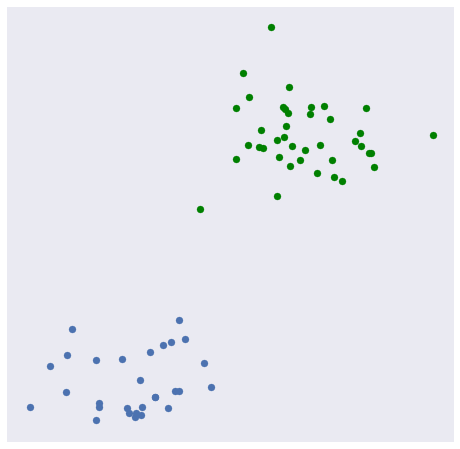

In [4]:
mean_c1 = [8, 12]
cov_c1 = [[1,0], [0, 1]]
c1 = np.random.multivariate_normal(mean_c1, cov_c1, 40)

mean_c2 = [4, 4]
cov_c2 = [[1,0], [0, 1]]
c2 = np.random.multivariate_normal(mean_c2, cov_c2, 29)


#Green distinguishes cluster 1 from cluster 2.
plt.figure(figsize=(8,8))
plt.scatter(c1[:,0], c1[:, 1], color = 'green')
plt.scatter(c2[:,0], c2[:, 1])

plt.xticks([], [])
plt.yticks([], [])

#### Useful Python Functions

Let us define some Python functions to calculate $a_i$, $b_i$, and ultimately the Silhouette Coefficient. These will be repeated where relevant.

In [5]:
from scipy.spatial import distance

#To compute b.
def compute_b(c1_pt1, c2):
    # Closest points across cluster distant points
    min_dist = np.inf
    hit_pt_c1, hit_pt_c2 = (None, None)
    
    for j, pt2 in enumerate(c2):
        d = distance.euclidean(c1_pt1, pt2)
        if d < min_dist:
            min_dist = d
            hit_pt_c2 = pt2
    return hit_pt_c2,  min_dist

#To compute a.
def compute_a(cluster, target_pt_id):
    distances = []
    for other_pt_id in range(len(cluster)):
        if  target_pt_id != other_pt_id:
            distances.append(distance.euclidean(cluster[target_pt_id], cluster[other_pt_id]))
    return np.mean(distances)

#To compute the silhouette coefficient.
def pt_silhouette(cluster, target_pt_id, other_cluster):
    a_i = compute_a(cluster, target_pt_id)
    _, b_i = compute_b(cluster[target_pt_id], other_cluster)
    return (b_i - a_i) / max(a_i, b_i)


### Finding $b_i$ for point *i*

Recall that $b_i$ is the smallest Euclidean distance between point *i* and a point not in the same cluster as *i* (separation). 

Below, we've selected a point in cluster 2 and plotted lines to show its position in respect to all points in cluster 1. Recall that c2[10] gives is a coordinate (point) in the array that we generated for c2.

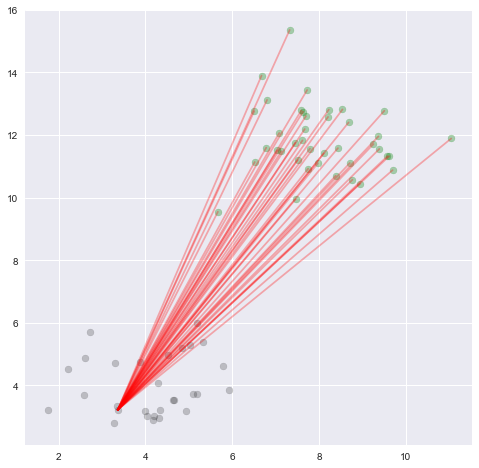

In [7]:
#This point is arbitrary. We could have selected c2[12], c2[1], c2[-1], and so on.  
c1_pt1 = c2[10]
plt.figure(figsize=(8,8))
plt.scatter(c1[:,0], c1[:, 1], c="green", alpha=0.3)
plt.scatter(c2[:,0], c2[:, 1], c='black', alpha=0.2)


for other_pt in c1:
    plt.plot([c1_pt1[0], other_pt[0]], [c1_pt1[1], other_pt[1]], 'r-', alpha=0.3)

Using the function compute_b we defined above, we can determine which point in cluster 1 gives us the smallest Euclidean distance to point *i* in cluster 2. 

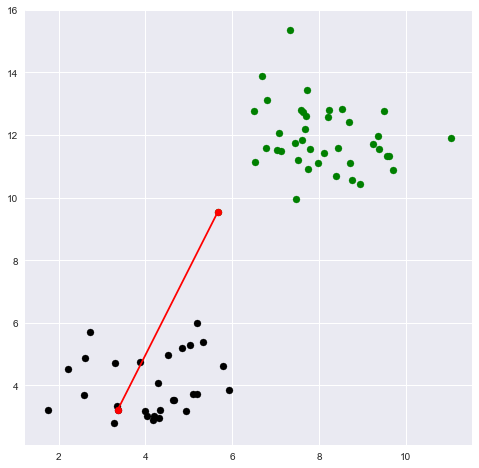

In [8]:
def compute_b(c1_pt1, c2):
    # Closest points across distant cluster points. 
    min_dist = np.inf
    hit_pt_c1, hit_pt_c2 = (None, None)
    
    for j, pt2 in enumerate(c2):
        d = distance.euclidean(c1_pt1, pt2)
        if d < min_dist:
            min_dist = d
            hit_pt_c2 = pt2
    return hit_pt_c2,  min_dist



c1_pt2, _ =  compute_b(c1_pt1, c1)
#Recall cl_pt1 = c2[10]

plt.figure(figsize=(8,8))
plt.scatter(c1[:,0], c1[:, 1], c="green")
plt.scatter(c2[:,0], c2[:, 1], c='black')
plt.scatter(c1_pt1[0], c1_pt1[1], color='red')
plt.scatter(c1_pt2[0], c1_pt2[1], color='red')


plt.plot([c1_pt1[0], c1_pt2[0]], [c1_pt1[1], c1_pt2[1]], 'r-')

We can see that the minimum distance between point i in cluster 2 and the closest point in cluster 2 seems reasonable. Thus, we have calculated the nearest coordinate for $b_i$ that will be used to calculate the Euclidean distance from itself and our point *i*.

In [21]:
#Inspecting the clostest coordinate from cluster 1 for b_i. The second value is our minimum distance.
c1_pt2, _ =  compute_b(c1_pt1, c1)
c1_pt2

array([5.67006246, 9.54680643])

### Finding $a_i$ for point *i*

Recall that $a_i$ is the average distance that point i has from all points in the same cluster (cohesion).

Below, we continue using point *i* and draw a line between it and all nearby points in cluster 2. 

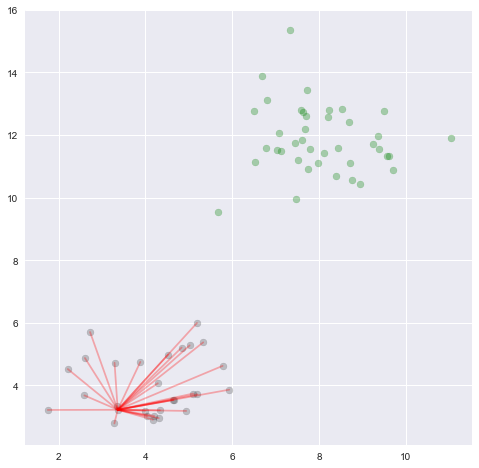

In [13]:
plt.figure(figsize=(8,8))
plt.scatter(c1[:,0], c1[:, 1], c="green", alpha=0.3)
plt.scatter(c2[:,0], c2[:, 1], c='black', alpha=0.2)


for pt1 in c2:
    if c1_pt1 in c2:
        plt.plot([pt1[0], c1_pt1[0]], [pt1[1], c1_pt1[1]], 'r-', alpha=0.3)

Using the function compute_a that we defined above, we will calculate the smallest Euclidean distance between point *i* and all points in cluster 2. We chose point number 10, so our point ID will be 10. 

In [25]:

def compute_a(cluster, target_pt_id):
    distances = []
    for other_pt_id in range(len(cluster)):
        if  target_pt_id != other_pt_id:
            distances.append(distance.euclidean(cluster[target_pt_id], cluster[other_pt_id]))
    return np.mean(distances)


#This is our a_i.
pt_id = 10
compute_a(c2, pt_id)

1.6222711068939986

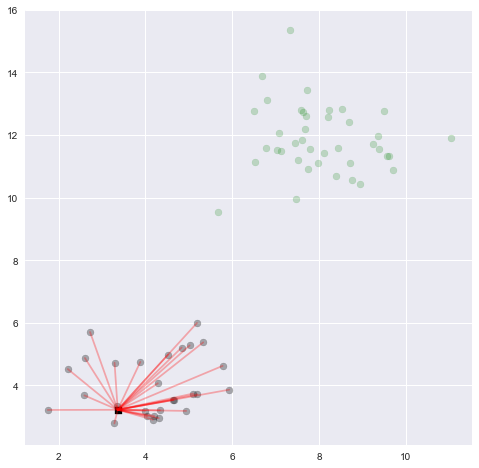

In [24]:
#We can also determine which point in cluster 2 that _is not itself_ that's closest to our specific point i in cluster 2. 
#It's the black box.
pt_id = 10
pt = c2[10]

plt.figure(figsize=(8,8))
plt.scatter(c1[:,0], c1[:, 1], c="green", alpha=0.2)
plt.scatter(c2[:,0], c2[:, 1], c='black', alpha=0.3)

for other_pt in c2:
    if other_pt.any() != str(pt):
        plt.plot([pt[0], other_pt[0]], [pt[1], other_pt[1]], 'r-', alpha=0.3)
        
plt.scatter(pt[0], pt[1], c='k', marker="s", alpha=1)   

### Finding the Silhouette Coefficient.

Now that we have calculated $a_i$ and $b_i$, we can estimate the Silhouette Coefficient for point *i*.

Using the function pt_silhouette we defined above, we can inspect the quality of the clustering.

In [26]:
def pt_silhouette(cluster, target_pt_id, other_cluster):
    a_i = compute_a(cluster, target_pt_id)
    _, b_i = compute_b(cluster[target_pt_id], other_cluster)
    return (b_i - a_i) / max(a_i, b_i)

#In our example, c2 was the cluster we select our point i from, pt_id was the coordinate (point) ID from cluster 2,
#and c1 was our other_cluster.
pt_silhouette(c2, pt_id, c1)    

0.7590871236904787

Recall that the Silhouette Coefficient's range is from -1 to 1, with outputs closer to 1 suggest good clustering and outputs closer to -1 suggest poor clustering. We can see that the output for this example is pretty good. 

This, however, is a Silhouette Coefficient for *one* point from cluster 2. Keep this in mind as we move forward.

### Visually extrapolating the Silhouette Coefficient.

This was an example from class. When asked to determine which graph has the best Silhouette Coefficient, remember that _best_ refers to the highest value and will always imply a positive value closer to 1.

Also, recall that a high Silhouette Coefficient is the result of high cohesion ($a_i$) or high separation($b_i$) or both, and a low Silhouette Coefficient is the result of low cohesion or low separation or both, and suggests poor clustering.

We can see that $b_i$ in graph B will be smaller than in graph A. We can also see that the spread of points for the clusters in graph B will be larger than graph A, so $a_i$ in graph B is larger than in graph A.

Since the equation for the Silhouette Coefficient has  $b_i$ -  $a_i$  in the numerator, we can expect graph B to have a lower Silhouette Coefficient estimate than graph A. If this does not make sense, don't panic. Examples with estimating the Cluster-Wide Silhouette Coefficient will be provided below. 

![A picture](http://128.171.10.138:4000/assets/ipynb/week_8/images/conf_index.png)

### A problem with choosing a point in one cluster over the other.

So far, we've chosen a point *i* from cluster 2 to determine its Silhouette Coefficient. What if we chose point *i* to be coordinate number 10 from cluster 1? We will see that its Silhouette Coefficient is different than when we used cluster 2. Indeed, we can expect different Silhouette Coefficients if we select different points in the clusters. 

In [21]:
#The Silhouette Cofficient from a point in cluster 1 to cluster 2, with the same point ID.

pt_id = 10
pt_c1 = c1[10]
print(compute_a(c1, pt_id))
print(compute_b(pt_id, c2)[1])
pt_silhouette(c1, pt_id, c2)

1.6311539464970655
7.004801548495085


0.7278155857848141

In [22]:
#The Silhouette Cofficient from a point in cluster 1 to cluster 2, with a DIFFERENT point ID.

pt_id = 11
pt_c1 = c1[11]
print(compute_a(c1, pt_id))
print(compute_b(pt_id, c2)[1])
pt_silhouette(c1, pt_id, c2)

2.488473932751527
8.38493253797854


0.526824899848668

## The solution: Averaging the Silhouette Coefficients to make the Cluster-Wide Silhouette Coefficient

How do we then determine a good estimate of the overall clustering if we have numerous clusters with numerous points? We compute a Cluster-Wide Silhouette Coefficient, which is the average of the silhouette coefficients for all data points from each cluster.

The following definition can be used to calculate the Cluster-Wide Silhouette Coefficient for two clusters, __with the order of submitted clusters determining which cluster that point *i* is affiliated with__. All it does is calculate the average Silhouette Coefficient for every point in the first cluster submitted. In our example above, our point ID was 10. With this new function, every point is evaluated.

We compute the Cluster Silhouette both ways before averaging them out. This is our Cluster-Wide Silhouette Coefficient.

In [23]:
#Remember that order is important!
def cluster_silhouette(cluster, other_cluster):
    silhouette_coeffs = []
    for pt_id in range(len(cluster)):
        silhouette_coeffs.append(pt_silhouette(cluster, pt_id, other_cluster))
    return(np.mean(silhouette_coeffs))
            

We can see the Cluster-Wide Silhouette is still pretty good. 

In [24]:
print(cluster_silhouette(c1, c2), cluster_silhouette(c2, c1))
np.mean([cluster_silhouette(c1, c2), cluster_silhouette(c2, c1)])

0.7666046256867531 0.757311230735563


0.761957928211158

### Application of the Cluster-Wide Silhouette Coefficient.

We will now use our new Python function cluster_silhouette on two examples with two clusters that are closer to one another. We will see that using this function shows us that the average Silhouette Coefficient is smaller than our previous example.

If you had some trouble determining whether Graph A or B from the above example had a higher silhouette Coefficient, perhaps this has clarified the answer. 

+ #### Example 1 for Cluster Wide-Silhouette Coefficient

([], <a list of 0 Text yticklabel objects>)

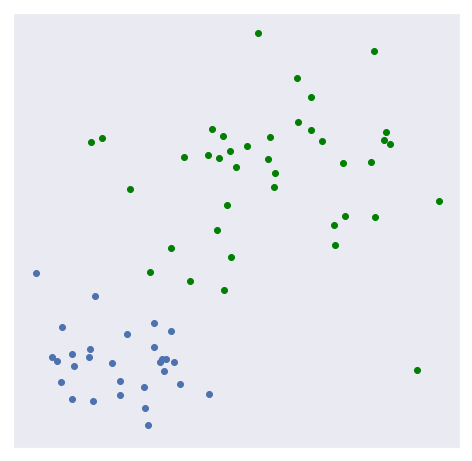

In [25]:
mean_c1 = [8, 12]
cov_c1 = [[6,0], [0, 9]]
c1 = np.random.multivariate_normal(mean_c1, cov_c1, 40)

mean_c2 = [4, 4]
cov_c2 = [[2,0], [0, 2]]
c2 = np.random.multivariate_normal(mean_c2, cov_c2, 29)



plt.figure(figsize=(8,8))
#The green one is cluster 1.
plt.scatter(c1[:,0], c1[:, 1], color = 'green')
plt.scatter(c2[:,0], c2[:, 1])

plt.xticks([], [])
plt.yticks([], [])

Notice how much smaller the Silhouette Coefficients are! 


In [26]:
print(cluster_silhouette(c1, c2), cluster_silhouette(c2, c1))
np.mean([cluster_silhouette(c1, c2), cluster_silhouette(c2, c1)])

0.2906595452324434 0.37269931335758605


0.3316794292950147

+ #### Example 2 for Cluster Wide-Silhouette Coefficient

([], <a list of 0 Text yticklabel objects>)

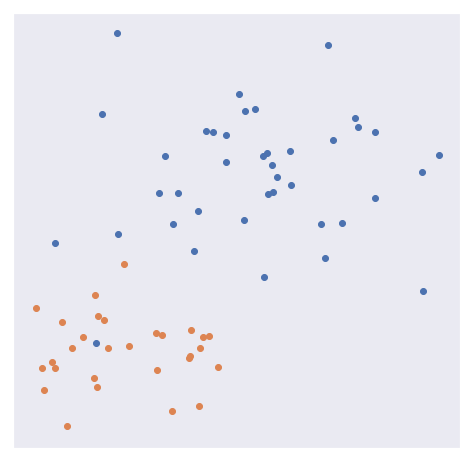

In [27]:
mean_c1 = [8, 12]
cov_c1 = [[8,0], [0, 13]]
c1 = np.random.multivariate_normal(mean_c1, cov_c1, 40)

mean_c2 = [4, 4]
cov_c2 = [[4,0], [0, 4]]
c2 = np.random.multivariate_normal(mean_c2, cov_c2, 29)



plt.figure(figsize=(8,8))
plt.scatter(c1[:,0], c1[:, 1])
plt.scatter(c2[:,0], c2[:, 1])

plt.xticks([], [])
plt.yticks([], [])

Our Silhouette Coefficients are even lower!

In [28]:
print(cluster_silhouette(c1, c2), cluster_silhouette(c2, c1))
np.mean([cluster_silhouette(c1, c2), cluster_silhouette(c2, c1)])

0.14613146414502007 -0.3002078680286604


-0.07703820194182016

### Using Silhouettes to Decide on Best Number of Cluster and Inspecting numerous k-values.

The Silhouette coefficient can be useful to determine the number of clusters present in the dataset, but it is insufficient to run the algorithm once. We must run the algorithm several times for each possible value of k and compute the overall Silhouette Coefficient each time because a different choice of starting values may result in a different assignment of points to clusters.

Eventually, we should find the best value of k that estimates the best Cluster-Wide Silhouette Coefficient.
